# 6.5 Unsupervised Machine Learning-Clustering

## Contents list:


#### 01 Importing libraries
#### 02 Importing data
#### 03 The elbow technique
#### 04 k-means clustering



#### 01 Importing libraries

In [1]:
# Step 1 - Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

#### 02 Importing data

In [2]:
# Project folder path as string
path = r'C:\Users\User\Desktop\Chocolate Bar Ratings'

In [3]:
# Step 2 - Import exploring_relationships.csv data set using the os library
df_c= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'exploring_relationships.csv'), index_col = False)

In [4]:
# Checking the number of rows and columns
df_c.shape

(1721, 10)

In [5]:
df_c.head()

,Unnamed: 0,company,specific_bean_origin_or_bar_name,reference_number,review_date,cocoa_percent,company_location,rating,broad_bean_origin,cocoa_percent_category
0,0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome,Low_cocoa_percentage
1,1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo,Middle_cocoa_percentage
2,2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo,Middle_cocoa_percentage
3,3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo,Middle_cocoa_percentage
4,4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru,Middle_cocoa_percentage


In [6]:
# Dropping the Unnamed: 0 column from df_c dataframe
df_c=df_c.drop(columns = ['Unnamed: 0'])

In [7]:
# Checking the number of rows and columns
df_c.shape

(1721, 9)

In [8]:
df_c.head()

,company,specific_bean_origin_or_bar_name,reference_number,review_date,cocoa_percent,company_location,rating,broad_bean_origin,cocoa_percent_category
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome,Low_cocoa_percentage
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo,Middle_cocoa_percentage
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo,Middle_cocoa_percentage
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo,Middle_cocoa_percentage
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru,Middle_cocoa_percentage


In [9]:
# Step 2 - Remove a categorical columns
df_c.drop(columns = ['company', 'specific_bean_origin_or_bar_name', 'company_location', 'broad_bean_origin','cocoa_percent_category'], inplace=True)

In [10]:
df_c.head()

,reference_number,review_date,cocoa_percent,rating
0,1876,2016,0.63,3.75
1,1676,2015,0.70,2.75
2,1676,2015,0.70,3.00
3,1680,2015,0.70,3.50
4,1704,2015,0.70,3.50


In [11]:
%matplotlib inline

#### 03 The elbow technique

In [12]:
# Step 3 - Defines the range of potential clusters in the data
num_cl = range(1, 10) 


In [13]:
# Step 3 - Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [ ]:
# Step 3 - Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_c).score(df_c) for i in range(len(kmeans))] 



In [15]:
score

[-515784070.23356295,
 -132702081.17846549,
 -59618944.00283342,
 -33353887.749391392,
 -21010946.187884595,
 -14947952.029813247,
 -10910038.504549729,
 -8431755.889252951,
 -6684646.794609107]

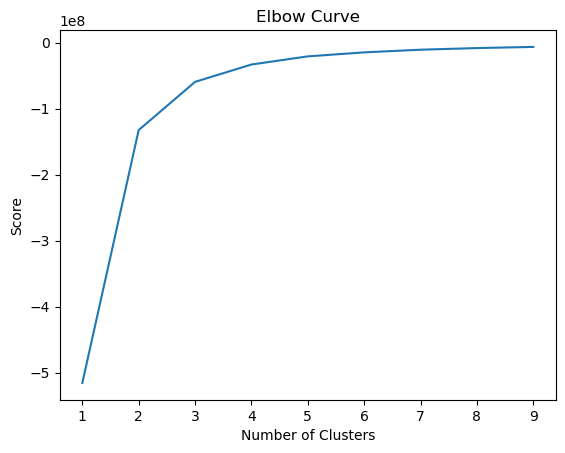

In [16]:
# Step 4 - Plot the elbow curve using PyLab

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

- The number of clusters to be used is 3 because after the number of clusters equal to 3 the curve becomes more and more straight.

#### 04 k-means clustering

In [17]:
# Step 5 - Create the k-means object

kmeans = KMeans(n_clusters = 3) 


In [18]:
# Step 5 - Fit the k-means object to the data

kmeans.fit(df_c)

KMeans(n_clusters=3)

In [19]:
# Step 6 - Create a 'clusters' column in the df_c
df_c['clusters'] = kmeans.fit_predict(df_c)

In [20]:
df_c.head()

,reference_number,review_date,cocoa_percent,rating,clusters
0,1876,2016,0.63,3.75,0
1,1676,2015,0.70,2.75,0
2,1676,2015,0.70,3.00,0
3,1680,2015,0.70,3.50,0
4,1704,2015,0.70,3.50,0


In [21]:
# Check the frequency of column
df_c['clusters'].value_counts()

0    651
2    587
1    483
Name: clusters, dtype: int64

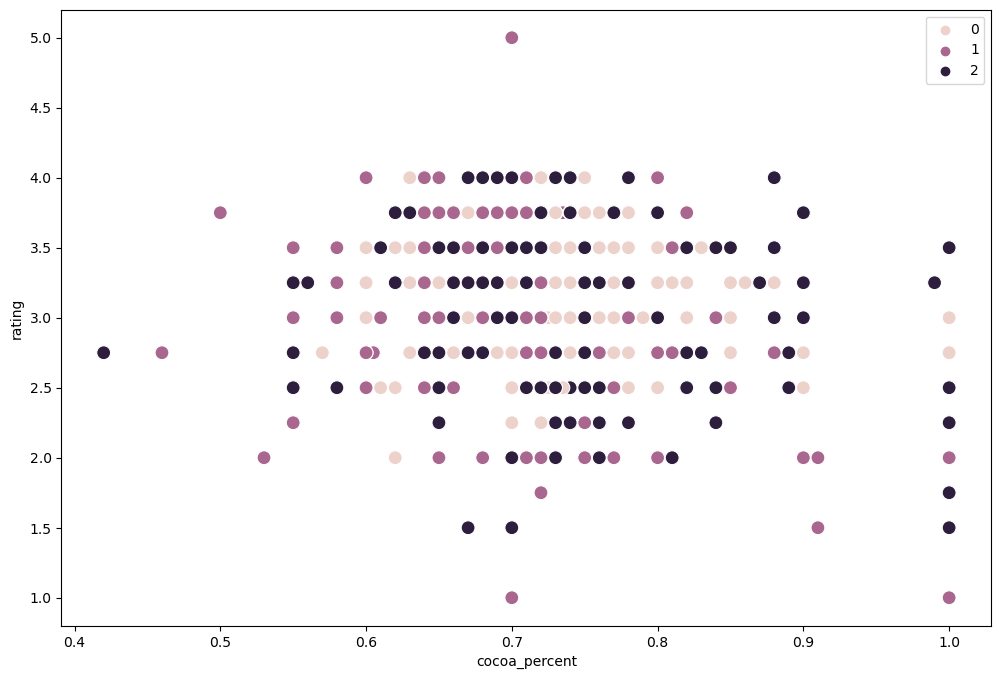

In [22]:
# Step 7 - Plot the clusters for the 'cocoa_percent' and 'rating' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_c['cocoa_percent'], y=df_c['rating'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('cocoa_percent') 
plt.ylabel('rating') 
plt.show()

In [23]:
df_c.loc[df_c['clusters'] == 2, 'cluster'] = 'dark purple'
df_c.loc[df_c['clusters'] == 1, 'cluster'] = 'purple'
df_c.loc[df_c['clusters'] == 0, 'cluster'] = 'pink'

In [24]:
# Step 9 - Descriptive statistics
df_c.groupby('cluster').agg({'cocoa_percent':['mean', 'median'], 
                         'rating':['mean', 'median']})

cocoa_percent           rating       
                     mean median      mean median
cluster                                          
dark purple      0.720562    0.7  3.192078   3.25
pink             0.718318    0.7  3.240015   3.25
purple           0.711491    0.7  3.141822   3.00

- Observing visualization of the clusters for the 'cocoa_percent' and 'rating' variables is hard to spot any patterns, that's why data need to be explored further to get better insights. By observing the table with descriptive statistics, it can be seen that all three clusters have the same median for the _cocoa_percent' variable, while for the 'rating' variable, the median is the same for two clusters, while one cluster differs. The differences in the arithmetic means between the clusters for each observed variable are small.